In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### IMPLEMENTATION FROM SCRATCH

#### As we have to find the Best set of Line 
#### formula : Y=mX+c
####      m=Variance of X/Covariance of X and y
####         : m=((X - x_mean) * (y - y_mean))/((X-x_mean)**2)
####         : c= y_mean - m * x_mean This ensures the line passes through the average point

Slope (m): 1.968467510701019
Intercept (c): 3.2221510774472293


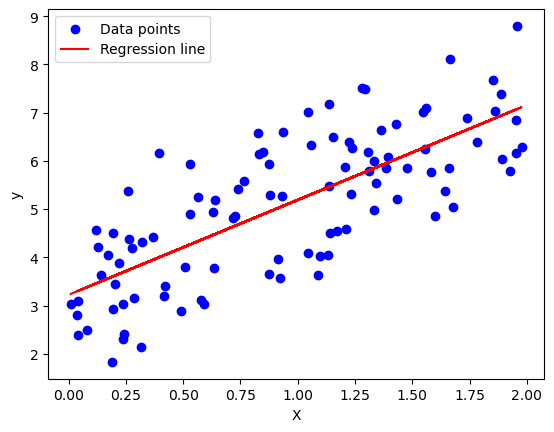

In [6]:
# Sample data
np.random.seed(0)
X = 2 * np.random.rand(100)
y = 3 + 2 * X + np.random.randn(100)

x_mean = np.mean(X)
y_mean = np.mean(y)

# slope
m = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean)**2)

# intercept
c = y_mean - m * x_mean

print("Slope (m):", m)
print("Intercept (c):", c)


y_pred = m * X + c

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


### NOW by Data set

In [18]:
df=pd.read_csv("Ecommerce_Customers.csv")

In [4]:
df.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [15]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model


5 steps in implementing model---

1. define the features in X and target in Y
2. train_test split the data test size=20%
3. create model =linear regression()===inbuilt class
4. model.fit (X_train,Y_train)
5. y_prediction=model.predict(X_test)


#visulise
sns.scatterplot(x=df['Yearly Amount Spent'], y=y_pred)

In [37]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features and target
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)  # RMSE
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

# Optional: coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Absolute Error (MAE): 8.558441885315215
Mean Squared Error (MSE): 109.86374118393945
Root Mean Squared Error (RMSE): 109.86374118393945
R2 Score: 0.9778130629184127
Coefficients: [25.5962591  38.78534598  0.31038593 61.89682859]
Intercept: -1044.2574146365569


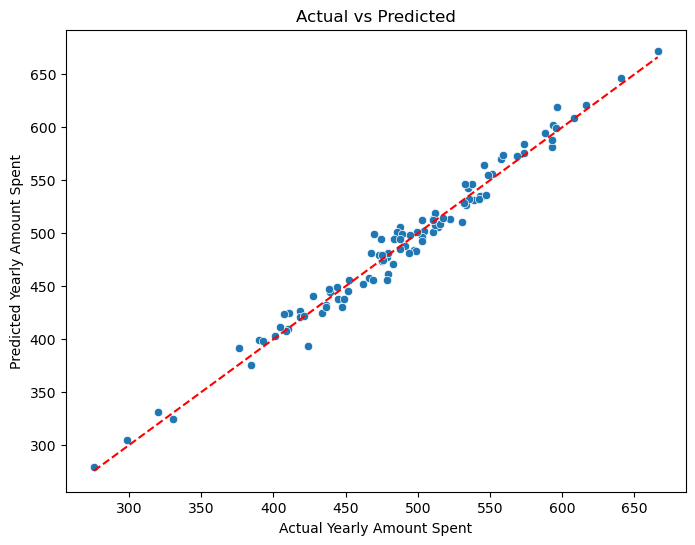

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("Predicted Yearly Amount Spent")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()

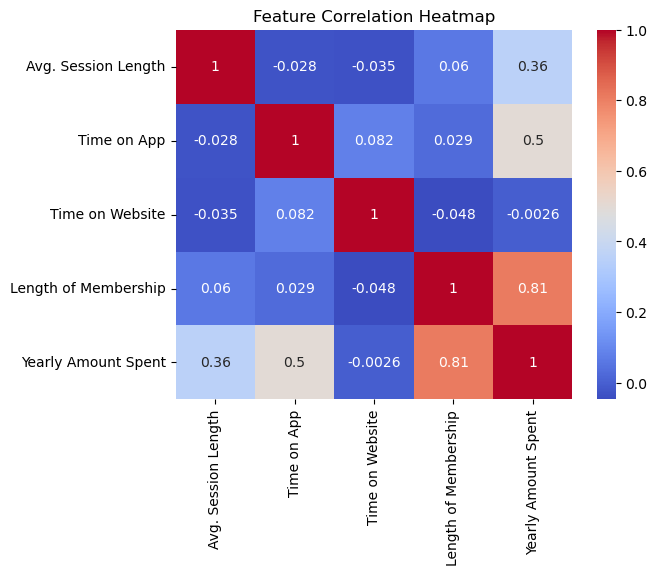

In [31]:
sns.heatmap(df[features + ['Yearly Amount Spent']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
